### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Γεωργία Μπουσμπουκέα

Α.Μ.: 03119059

**imports**

In [61]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [62]:
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Dataset/indian_pines_corrected.npy'

indian_pines = np.load(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [63]:
file_path = '/content/drive/My Drive/Dataset/indian_pines_gt.npy'

ground_truth = np.load(file_path)

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

**2α**

Οι διαστάσεις της εικόνας είναι 145* 145 πίξελ και έχει 200 φασματικά κανάλια.

In [64]:
print(indian_pines.shape)

(145, 145, 200)


**2β**

Βλέπω τα ζητούμενα κανάλια χρησιμοποιώντας τον viridis colormap. Σε γενικές γραμμές, μπορώ να πώ πως το υλικό που αντιστοιχεί στο 3ο κανάλι εντοπίζεται σε ελάχιστα σημεία της εικόνας, αυτό που αντιστοιχεί στο 65ο εντοπίζεται σε αρκετά, ενώ αυτό που αντιστοιχεί στο 95ο εντοπίζεται σε όλη την εικόνα, σε μεσαία όμως ένταση.

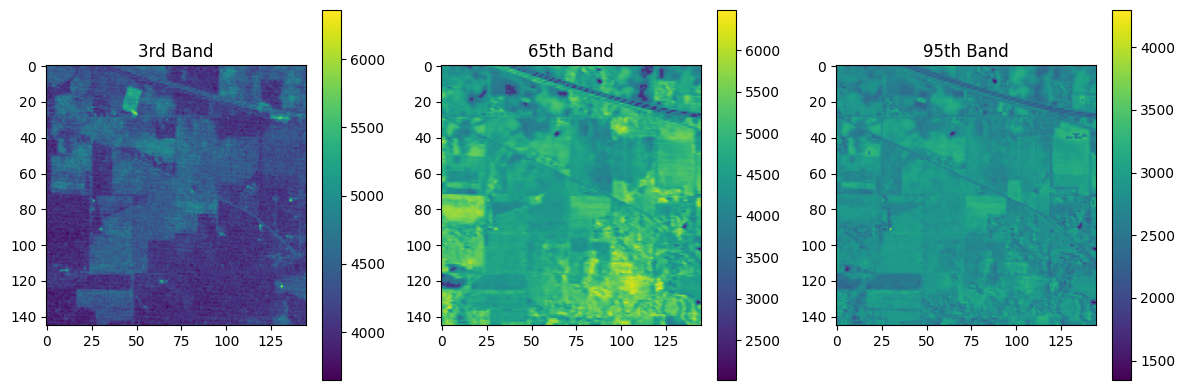

In [65]:
band_3 = indian_pines[:, :, 2]  # 0-based index
band_65 = indian_pines[:, :, 64]
band_95 = indian_pines[:, :, 94]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(band_3, cmap='viridis')
plt.title('3rd Band')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(band_65, cmap='viridis')
plt.title('65th Band')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(band_95, cmap='viridis')
plt.title('95th Band')
plt.colorbar()

plt.tight_layout()
plt.show()

**2γ**

To ground_truth αντιστοιχεί καθένα από τα 21025 πίξελ της εικόνας με έναν αριθμό 0-16, ο οποίος αντιστοιχεί σε μία από τις προανεφερθέντες κλάσεις. Μετράω και βλέπω πως όλες οι κλάσεις είναι παρούσες στην εικόνα.

In [66]:
print(ground_truth.shape)
unique_categories = np.unique(ground_truth)
num_categories = len(unique_categories)
print("Number of unique categories present in ground_truth:", num_categories)

(145, 145)
Number of unique categories present in ground_truth: 17


**2δ**

Χρησιμοποιώντας τον tab20 colormap, αφού κάνω κάποιες τροποποιήσεις για να έχω 17 χρώματα ακριβώς, βλέπω την κατανομή των στοιχείων στην εικόνα.

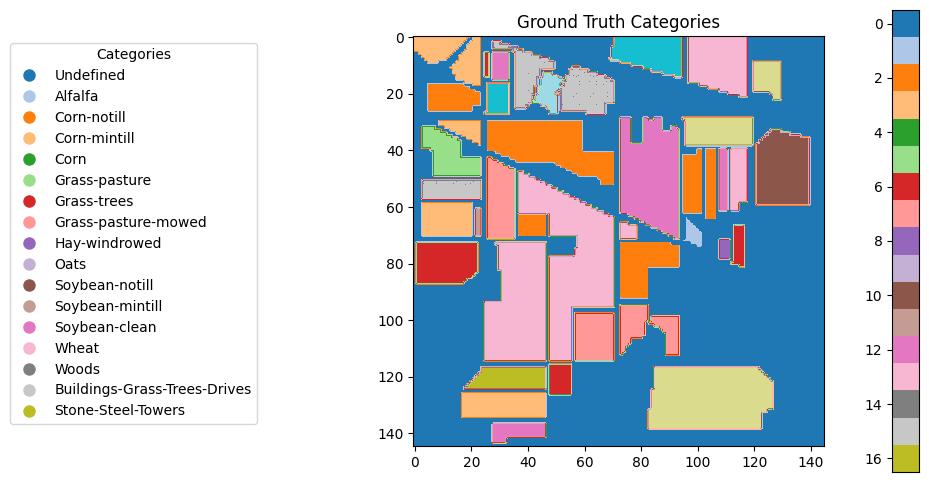

In [67]:
classes = [
    "Undefined", "Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees",
    "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean",
    "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"
]

num_categories = len(classes)
colors = plt.cm.tab20(np.linspace(0, 1, 20))[:num_categories]    #an array with the colors of tab20, i slice only the first 17 colors

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.imshow(ground_truth, cmap='tab20')
plt.title('Ground Truth Categories')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=classes[i])
    for i in range(num_categories)
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-1, 1), title='Categories') #i move the legend so it doesnt overlap with the plot

plt.subplot(1, 2, 2)
plt.imshow(np.arange(num_categories).reshape(-1, 1), cmap=plt.matplotlib.colors.ListedColormap(colors))  #plot the colorbar
plt.xticks([])

plt.subplots_adjust(wspace=-0.3)
plt.show()


**2ε**

In [68]:
unique_values, counts = np.unique(ground_truth, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value {value} occurs {count} times.")


Value 0 occurs 10776 times.
Value 1 occurs 46 times.
Value 2 occurs 1428 times.
Value 3 occurs 830 times.
Value 4 occurs 237 times.
Value 5 occurs 483 times.
Value 6 occurs 730 times.
Value 7 occurs 28 times.
Value 8 occurs 478 times.
Value 9 occurs 20 times.
Value 10 occurs 972 times.
Value 11 occurs 2455 times.
Value 12 occurs 593 times.
Value 13 occurs 205 times.
Value 14 occurs 1265 times.
Value 15 occurs 386 times.
Value 16 occurs 93 times.


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

**3α**

In [69]:
indian_pines_resh = indian_pines.reshape(-1, indian_pines.shape[2])
print(indian_pines_resh.shape)
ground_truth_resh = ground_truth.flatten()
print(ground_truth_resh.shape)

non_zero_indices = np.where(ground_truth_resh != 0) #undefined have 0 value
ground_truth_filt = ground_truth_resh[non_zero_indices]
indian_pines_filt = indian_pines_resh[non_zero_indices]
print(indian_pines_filt.shape)
print(ground_truth_filt.shape)

(21025, 200)
(21025,)
(10249, 200)
(10249,)


**3β**

Κάνω loop στo ground truth, κρατώντας σε ένα λεξικό για κάθε κατηγορία τα indexes(πιξελ) στα οποία εμφανίζεται. Έπειτα σε loop επί του λεξικού επιλέγω τυχαία ένα Index για κάθε κατηγορία και την αντίστοιχη τιμή του από την εικόνα και τέλος ταξινομώ, ώστε να έχω τις κατηγορίες στην σειρά.

In [70]:
unique_categories = np.arange(1, 17)   # i dont have category 0 now

pixels_by_category = {}

# collect the indices of each category
category_indices = {category: [] for category in unique_categories}
for index, category in enumerate(ground_truth_filt):
  category_indices[category].append(index)

#select a random index from the available indices and the pixel that corresponds to this index
for category, indices in category_indices.items():
    random_index = random.choice(indices)
    pixels_by_category[category] = indian_pines_filt[random_index]

pixels_by_category = dict(sorted(pixels_by_category.items(), key=lambda item: item[0])) #sort by key values

**3γ**

Ψάχνω την φασματική υπογραφή των πίξελ κάθε κατηγορίας που βρήκα, δηλαδή τα endmembers της εικόνας. Τα απεικονίζω έχοντας στον x άξονα τα κανάλια και στον y τις διάφορες τιμές του πίξελ για τα αντίστοιχα κανάλια.

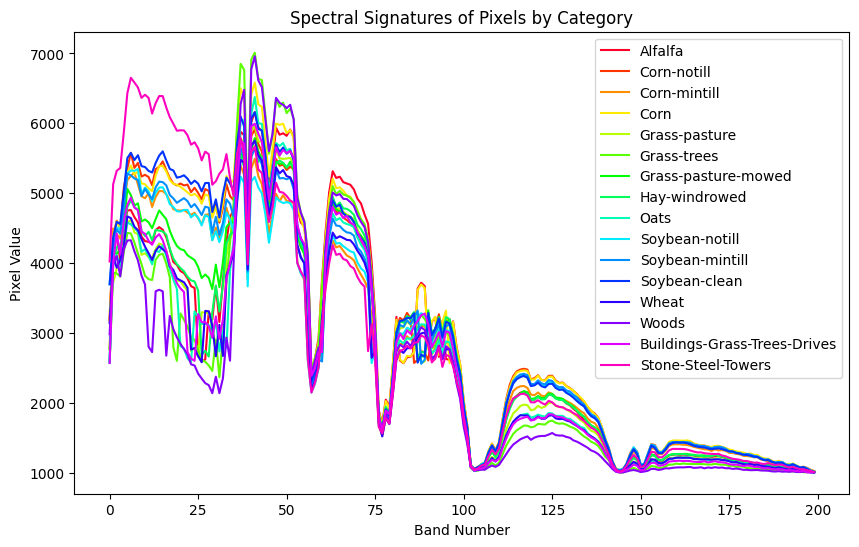

In [71]:
classes_wo0 = [
    "Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees",
    "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean",
    "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"
]

num_categories = len(pixels_by_category)
colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_categories))

plt.figure(figsize=(10, 6))

for category, pixel_value, color in zip(classes_wo0, pixels_by_category.values(), colors):
    plt.plot(pixel_value, label=category, color=color)

plt.title('Spectral Signatures of Pixels by Category')
plt.xlabel('Band Number')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()

**3δ**

Καθώς πρακτικά πρόκειται για mixed pixels προκύπτουν διγράμματα με διαφοροποιήσεις για τα πίξελ της ίδιας κατηγορίας.

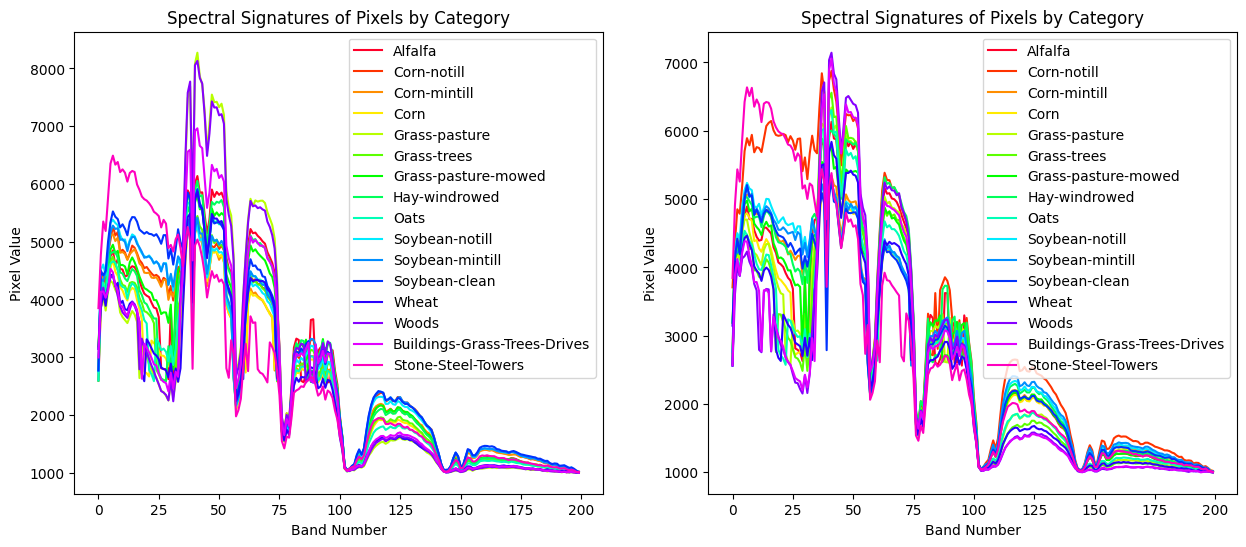

In [72]:
#2nd repeat
pixels_by_category = {}
for category, indices in category_indices.items():
    random_index = random.choice(indices)
    pixels_by_category[category] = indian_pines_filt[random_index]

pixels_by_category = dict(sorted(pixels_by_category.items(), key=lambda item: item[0])) #sort by key values

colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_categories))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for category, pixel_value, color in zip(classes_wo0, pixels_by_category.values(), colors):
    plt.plot(pixel_value, label=category, color=color)

plt.title('Spectral Signatures of Pixels by Category')
plt.xlabel('Band Number')
plt.ylabel('Pixel Value')
plt.legend()

#3rd repeat
pixels_by_category = {}
for category, indices in category_indices.items():
    random_index = random.choice(indices)
    pixels_by_category[category] = indian_pines_filt[random_index]

pixels_by_category = dict(sorted(pixels_by_category.items(), key=lambda item: item[0])) #sort by key values

plt.subplot(1, 2, 2)
for category, pixel_value, color in zip(classes_wo0, pixels_by_category.values(), colors):
    plt.plot(pixel_value, label=category, color=color)

plt.title('Spectral Signatures of Pixels by Category')
plt.xlabel('Band Number')
plt.ylabel('Pixel Value')
plt.legend()
plt.show()

**3ε**

Αρχικά παρατηρώ πως κάποιες καλλιέργειες έχουν πιο ξεχωριστή φασματική υπογραφή από άλλες, κάτι που τις καθιστά πιο εύκολα διαχωρίσιμες. Παραδείγματος χάρην, η κατηγορία Stone-Steel-Towers φαίνεται σε όλα τα διαγράμματα να έχει την μεγαλύτερη ένταση για τα κανάλια 0-40, με αισθητή διαφορά από την επόμενη κατηγορία. Κάτι παρόμοιο μπορώ να πώ για το Woods και το Grass-pasture στα κανάλια 30-60.

Επίσης παρατηρώ πως δεν είναι ολά τα bands χρήσιμα. Π.χ. στα κανάλια 100-200 και ιδίως στα 150-200, όλα τα πίξελ παίρνουν χαμηλές τιμές, κάτι που τα καθιστά μη διαχωρίσιμα.

**3στ**

Πράγματι, μέσω του heatmap, βλέπω πως υπάρχει μεγάλη συσχέτιση στα bands, όπου οι διάφορες κατηγορίες παρουσιάζουν παρόμοια συμπεριφορά, π.χ. 0-25, 30-75, 80-100, 100-200.

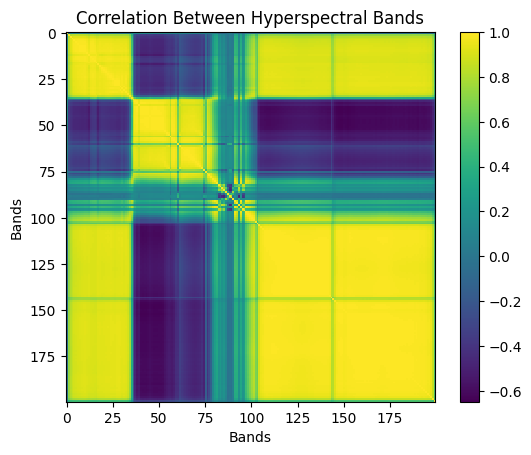

In [73]:
correlation_matrix = np.corrcoef(indian_pines_filt.T)

# Plotting the correlation matrix as a heatmap
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Between Hyperspectral Bands')
plt.xlabel('Bands')
plt.ylabel('Bands')
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

Η kmeans.fit_predict() θα δώσει προβλέψεις γι κατηγορίες 0-15, οι οποίες αντιστοιχούν στις 1-16 αρχικές.

In [74]:
n_clusters = 16

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(indian_pines_filt)

unique_values, counts = np.unique(cluster_labels, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value {value} occurs {count} times.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value 0 occurs 1472 times.
Value 1 occurs 508 times.
Value 2 occurs 1574 times.
Value 3 occurs 495 times.
Value 4 occurs 459 times.
Value 5 occurs 742 times.
Value 6 occurs 515 times.
Value 7 occurs 456 times.
Value 8 occurs 851 times.
Value 9 occurs 626 times.
Value 10 occurs 78 times.
Value 11 occurs 164 times.
Value 12 occurs 405 times.
Value 13 occurs 802 times.
Value 14 occurs 511 times.
Value 15 occurs 591 times.


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [75]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2)) #check if c1, c2 have the same inique values -> categories

    m = np.ones([l1, l2]) #initialize cost matrix
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [76]:
ground_truth_filt=ground_truth_filt-1 #to have all the categories in 0-15
cluster_labels_trans=translate_predicted_labels(cluster_labels, ground_truth_filt)

accuracy_sc = accuracy_score(ground_truth_filt, cluster_labels_trans)
print(f"Accuracy: {accuracy_sc}")

map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy: 0.3554493121280125


Το Rand Score μετρά την ομοιότητα μεταξύ αληθινής και προβλεπόμενης ομοδοποίησης, μετρώντας τα ζευγάρια που βρίσκονται είτε στην ίδια ομάδα είτε σε διαφορετικές ομάδες και στην αληθινή και στην προβλεπόμενη ομαδοποίηση, για κάθε ζεύγος (1-> τέλεια ομοιότητα).

In [77]:
rand_sc = adjusted_rand_score(ground_truth_filt, cluster_labels)
print("Adjusted Rand Index:", rand_sc)

Adjusted Rand Index: 0.205184479919157


Το Silhouette Score μετρά πόσο καλά είναι διαχωρισμένες οι ομάδες. Αν τείνει στο 1, υποδηλώνει καλά διαχωρισμένες ομάδες, τιμές κοντά στο 0 υποδηλώνουν επικαλυπτόμενες ομάδες και αρνητικές τιμές υποδηλώνουν λάθος ομαδοποιημένα δεδομένα.

In [78]:
silhouette_sc = silhouette_score(indian_pines_filt, cluster_labels)
print("Silhouette Score:", silhouette_sc)

Silhouette Score: 0.2821754627335447


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

In [79]:
conf_matrix = confusion_matrix(ground_truth_filt, cluster_labels_trans)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy using the confusion matrix:", accuracy(conf_matrix))

Confusion Matrix:
[[  0   0   0   1   0   0   0  44   1   0   0   0   0   0   0   0]
 [114 294 274  62   0   2   9   1   6 128 234 303   1   0   0   0]
 [ 53  54 278  77   0   0  15   0   1 105 155  92   0   0   0   0]
 [ 30  72   1  49   0   0   0   1  28   3   5  35  13   0   0   0]
 [  4   0   0  12 195  38   0  22  86   0   1   1   1 112  11   0]
 [  0   0   0   0   2 346   0   0  83   0   0   0 254  43   2   0]
 [  0   0   0   9   0   0   0  19   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 365 113   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8   0   0   5   0   0   0   7   0   0   0]
 [ 73   0 226 154   0   0   4   3  10 260 212  30   0   0   0   0]
 [ 85  43 743 227   0   8  74   1  36 246 806 185   1   0   0   0]
 [ 98  42  48  27   0   0  54   0   3 108  59 154   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   0   0   0 203   0   0   0]
 [  0   0   0   0 312   8   0   0   0   0   0   0   6 527 412   0]
 [  2   0   1   7   2  85   8   0  32   1   

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

10249


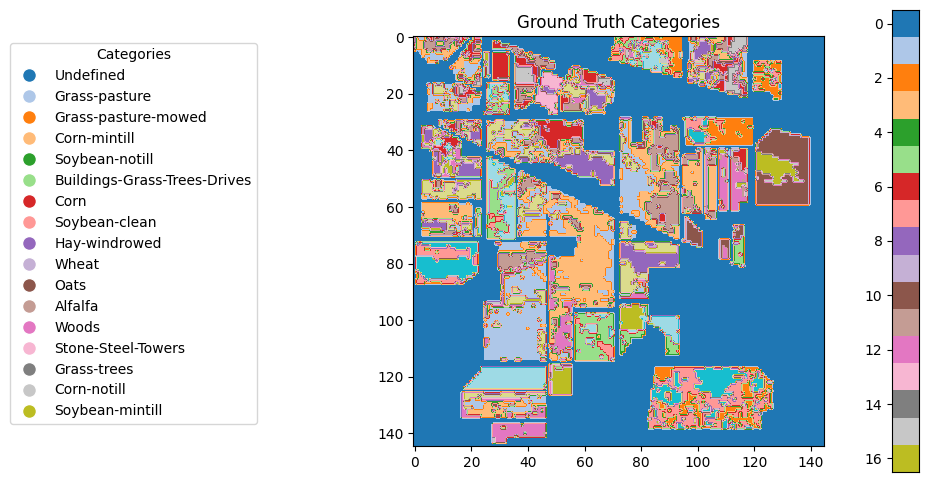

In [80]:
cluster_labels=cluster_labels+1

predicted_image = np.empty_like(ground_truth_resh)
j = 0
# Loop through ground_truth_resh
for i in range(len(ground_truth_resh)):
    if ground_truth_resh[i] == 0:
        predicted_image[i] = 0
    else:
        predicted_image[i] = cluster_labels[j]
        j += 1

predicted_image=predicted_image.reshape(145, 145)
print(j)

'''
category_mapping = {
    0:0, 1: 11, 2: 15, 3: 3, 4: 6,
    5: 1, 6: 14, 7: 2, 8: 8,
    9: 10, 10: 4, 11: 16, 12: 7,
    13: 9, 14: 12, 15: 5, 16: 13
}

#old order
classes = [
    "Undefined" 0, 1"Alfalfa", 2"Corn-notill",3 "Corn-mintill", 4"Corn", 5"Grass-pasture",6 "Grass-trees",
    7"Grass-pasture-mowed", 8"Hay-windrowed", 9"Oats", 10"Soybean-notill", 11"Soybean-mintill", 12"Soybean-clean",
    13"Wheat",14 "Woods", 15"Buildings-Grass-Trees-Drives", 16"Stone-Steel-Towers"
]
'''
#use the mapping to define new order of classes
classes = [
    "Undefined", "Grass-pasture", "Grass-pasture-mowed", "Corn-mintill", "Soybean-notill", "Buildings-Grass-Trees-Drives",
    "Corn", "Soybean-clean", "Hay-windrowed", "Wheat", "Oats", "Alfalfa", "Woods", "Stone-Steel-Towers", "Grass-trees",
    "Corn-notill", "Soybean-mintill"
]

num_categories = len(classes)
colors = plt.cm.tab20(np.linspace(0, 1, 20))[:num_categories]    #an array with the colors of tab20, i slice only the first 17 colors

plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.imshow(predicted_image, cmap='tab20')
plt.title('Ground Truth Categories')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=classes[i])
    for i in range(num_categories)
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-1, 1), title='Categories') #i move the legend so it doesnt overlap with the plot

plt.subplot(1, 2, 2)
plt.imshow(np.arange(num_categories).reshape(-1, 1), cmap=plt.matplotlib.colors.ListedColormap(colors))  #plot the colorbar
plt.xticks([])

plt.subplots_adjust(wspace=-0.3)
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

Θέλουμε, δηλαδή, να κάνουμε dimentionality reduction (compression), δημιουργώντας 3 χαρακτηριστικά από τα 200 αρχικά κανάλια, ως συνδιασμό αυτών. Αυτό θα δουλέψει, γιατί είδαμε πως αρκετά από αυτά δεν προσφέρουν ιδιαίτερη πληροφορία ή έχουν υψηλή συσχέτιση με άλλα.

In [81]:
scaler = StandardScaler()
indian_pines_scaled = scaler.fit_transform(indian_pines_filt) #scale for better results

pca = PCA(n_components=3)
pca_result = pca.fit_transform(indian_pines_scaled)
pca_result

array([[ 5.21762   ,  4.98153764,  0.97038627],
       [ 7.90600248, -1.15983084, -0.48151839],
       [ 8.84107576, -3.03606895, -1.12209264],
       ...,
       [ 4.61029742,  0.60270183, -2.50254052],
       [ 5.54530713,  0.28004584, -2.4764812 ],
       [ 6.61916679,  0.06054079, -2.57711112]])

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

Προκύπτουν τα PC1, PC2, PC3, με φθίνουσα σειρά διακύμανσης μεταξύ των χαρακτηριστικών (προσφoράς περισσότερης πληροφορίας). Συνολικά διατηρούμε το (0.687+0.189+0.03= 0.906) 90.6% της αρχικής πληροφορίας.

In [82]:
explained_var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_var_ratio)

Explained variance ratio for each component: [0.68658669 0.18907475 0.02952763]


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

Παρατηρώ ότι η μείωση στην ακρίβεια ήταν πράγματι μικρή.

In [83]:
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_pca = kmeans.fit_predict(pca_result)
cluster_labels_trans_pca=translate_predicted_labels(cluster_labels_pca, ground_truth_filt)

accuracy_sc_pca = accuracy_score(ground_truth_filt, cluster_labels_trans_pca)
print("Accuracy:", accuracy_sc_pca)
rand_sc_pca = adjusted_rand_score(ground_truth_filt, cluster_labels_pca)
print("Adjusted Rand Index:", rand_sc_pca)
silhouette_sc_pca = silhouette_score(pca_result, cluster_labels_pca)
print("Silhouette Score:", silhouette_sc_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 15
map: 3 --> 5
map: 4 --> 2
map: 5 --> 6
map: 6 --> 12
map: 7 --> 0
map: 8 --> 1
map: 9 --> 3
map: 10 --> 7
map: 11 --> 4
map: 12 --> 8
map: 13 --> 10
map: 14 --> 9
map: 15 --> 14
Accuracy: 0.34988779393111524
Adjusted Rand Index: 0.20580368755558298
Silhouette Score: 0.37035231333488544


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

In [84]:
accuracies=[]
rands=[]
silhouettes=[]
for n_components in range (1, 11):
  pca = PCA(n_components)
  pca_result = pca.fit_transform(indian_pines_scaled)
  cluster_labels_pca = kmeans.fit_predict(pca_result)
  cluster_labels_trans_pca=translate_predicted_labels(cluster_labels_pca, ground_truth_filt)
  accuracies.append(accuracy_score(ground_truth_filt, cluster_labels_trans_pca))
  rands.append(adjusted_rand_score(ground_truth_filt, cluster_labels_pca))
  silhouettes.append(silhouette_score(pca_result, cluster_labels_pca))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 9
map: 2 --> 4
map: 3 --> 11
map: 4 --> 3
map: 5 --> 5
map: 6 --> 7
map: 7 --> 2
map: 8 --> 1
map: 9 --> 0
map: 10 --> 14
map: 11 --> 12
map: 12 --> 10
map: 13 --> 8
map: 14 --> 15
map: 15 --> 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 13
map: 2 --> 8
map: 3 --> 11
map: 4 --> 10
map: 5 --> 7
map: 6 --> 9
map: 7 --> 5
map: 8 --> 15
map: 9 --> 4
map: 10 --> 12
map: 11 --> 3
map: 12 --> 0
map: 13 --> 6
map: 14 --> 2
map: 15 --> 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 15
map: 3 --> 5
map: 4 --> 2
map: 5 --> 6
map: 6 --> 12
map: 7 --> 0
map: 8 --> 1
map: 9 --> 3
map: 10 --> 7
map: 11 --> 4
map: 12 --> 8
map: 13 --> 10
map: 14 --> 9
map: 15 --> 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 14
map: 2 --> 3
map: 3 --> 4
map: 4 --> 8
map: 5 --> 1
map: 6 --> 2
map: 7 --> 12
map: 8 --> 7
map: 9 --> 6
map: 10 --> 0
map: 11 --> 13
map: 12 --> 15
map: 13 --> 9
map: 14 --> 5
map: 15 --> 11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 6
map: 3 --> 13
map: 4 --> 0
map: 5 --> 3
map: 6 --> 8
map: 7 --> 11
map: 8 --> 4
map: 9 --> 9
map: 10 --> 1
map: 11 --> 12
map: 12 --> 2
map: 13 --> 7
map: 14 --> 15
map: 15 --> 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 8
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 6
map: 9 --> 15
map: 10 --> 10
map: 11 --> 12
map: 12 --> 9
map: 13 --> 0
map: 14 --> 3
map: 15 --> 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 14
map: 2 --> 11
map: 3 --> 6
map: 4 --> 2
map: 5 --> 5
map: 6 --> 3
map: 7 --> 15
map: 8 --> 8
map: 9 --> 4
map: 10 --> 7
map: 11 --> 12
map: 12 --> 0
map: 13 --> 13
map: 14 --> 1
map: 15 --> 9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 6
map: 3 --> 4
map: 4 --> 7
map: 5 --> 2
map: 6 --> 14
map: 7 --> 1
map: 8 --> 9
map: 9 --> 0
map: 10 --> 12
map: 11 --> 11
map: 12 --> 13
map: 13 --> 3
map: 14 --> 15
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 4
map: 2 --> 8
map: 3 --> 9
map: 4 --> 14
map: 5 --> 7
map: 6 --> 11
map: 7 --> 3
map: 8 --> 10
map: 9 --> 2
map: 10 --> 12
map: 11 --> 6
map: 12 --> 15
map: 13 --> 5
map: 14 --> 0
map: 15 --> 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 5
map: 2 --> 13
map: 3 --> 1
map: 4 --> 3
map: 5 --> 8
map: 6 --> 14
map: 7 --> 11
map: 8 --> 7
map: 9 --> 4
map: 10 --> 6
map: 11 --> 12
map: 12 --> 10
map: 13 --> 9
map: 14 --> 0
map: 15 --> 15


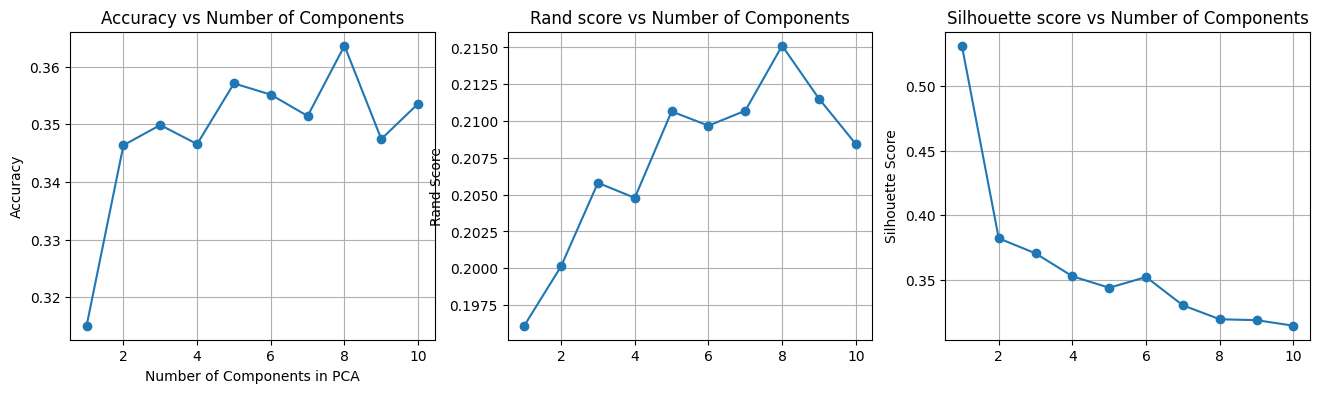

0.3636452336813348

In [85]:
n_components_values = range(1, 11)

plt.figure(figsize=(16, 4))

plt.subplot(1,3,1)
plt.plot(n_components_values, accuracies, marker='o')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components in PCA')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(n_components_values, rands, marker='o')
plt.title('Rand score vs Number of Components')
plt.ylabel('Rand Score')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(n_components_values, silhouettes, marker='o')
plt.title('Silhouette score vs Number of Components')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

max(accuracies)

Παίρνουμε καλύτερη ακρίβεια για 8 components. Γενικά, η αύξηση του πλήθους των components θα δώσει καλύτερη ακρίβεια (ή και όχι για +-2 τιμές στο num_components). Όμως, οι διαφορές είναι πολύ μικρές και το κέρδος σε κόστος υπολογισμού και σε απλότητα είναι πολύ μεγάλο, οπότε συμφέρει να χρησριμοποιούμε PCA.

Η αύξηση της ακρίβειας συνοδεύεται, προφανώς, από αύξηση στην ομοιότητα μεταξύ πραγματικών ομάδων και ομάδων που δημιουργούνται μέσω του kmeans. Ωστόσο, υπάρχει αύξηση της επικάλυψης μεταξύ ομάδων: tradeoff μεταξύ καλά διαχωρισμένων ομάδων και μεγαλύτερης διακύμανσης των ομάδων, που προσφέρουν τα περισσότερα components.